## ЗАДАНИЕ 9
# написать программу, которая будет скрейпить данные из imdb. Рекомендуемые библиотеки: BeautifulSoup, requests и random. Программа должна выполнять следующий функционал:
# a. При запуске программа должна подключаться к странице https://www.imdb.com/chart/top;
# b. Собирать список фильмов и их описание
# c. Выводить 10 случайных фильмов

Импортируем необходимые библиотеки

In [94]:
import requests
from bs4 import BeautifulSoup
import random
from urllib.request import urlopen


Переходим на сайт 2ip(например) и во вкладке "Информация от вашего браузера" копируем наш ""user-agent" . Без него не получится выгрузить сайт.
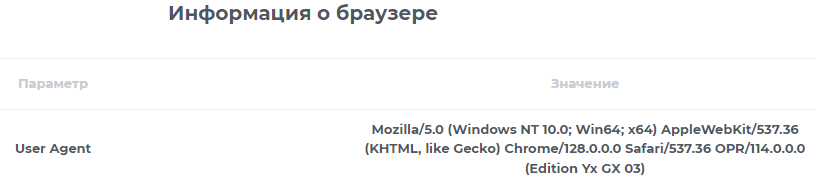

Получаем список названий фильмов, преобразуем в массив и берём из него рандомно 10 фильмов.

In [95]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36 OPR/114.0.0.0 (Edition Yx GX 03)"}
response = requests.get("https://www.imdb.com/chart/top", headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')

all_headers = soup.find_all('h3', class_="ipc-title__text")
all_headers = all_headers[1:-1]
top_headers = []
for header in all_headers:
    top_headers.append(header.get_text())
random_movies = random.sample(top_headers, 10)


Далее получаем с сайта массив ссылок для каждого фильма

In [ ]:
all_links = soup.find_all('a', class_="ipc-title-link-wrapper")
link_list = [link.get('href') for link in all_links 
             if link.get('href') is not None]
top_links = []
for link in link_list:
    top_links.append(link)

1) Далее в цикле проходимся по массиву с рандомными фильмами, узнаем под каким номером тот или иной фильм и находим соотвветствующую ему ссылку.
2) Потом программа выгружает страницу каждого из фильмов и берёт описание.
3) После, убираем нумерацию фильмов как на сайте (для красоты)
4) И наконец выводим фильмы с их описанием

In [97]:
print("СПИСОК ФИЛЬМОВ")

for i in range(len(random_movies)):
    url = ''
    numbers = ''
    count = 0
    for j in random_movies[i]:
        if j != '.':
            count+=1
            numbers += j
        else:
            count+=1
            break
    
    url = 'https://www.imdb.com' + top_links[int(numbers)-1]
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    description = soup.find_all('p', class_="sc-3ac15c8d-3 bMUzwm")
    for des in description:
        random_movie = random_movies[i]
        random_movie = random_movie[int(count):]

        print(f'Фильм {i+1}:', random_movie, '\nОписание:', f'{des.get_text()}\n')
    url = ''
    numbers = ''

СПИСОК ФИЛЬМОВ
Фильм 1:  Властелин колец: Братство кольца 
Описание: A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.

Фильм 2:  Криминальное чтиво 
Описание: The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.

Фи